In [11]:
library(LalRUtils)
libreq(WDI,
    countrycode,
    rvest,
    tidyverse,
    huxtable)
theme_set(lal_plot_theme())

Installing package into ‘/home/alal/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TMB’, ‘broom.mixed’, ‘flextable’, ‘officer’, ‘psych’




     wants         loaded
[1,] "WDI"         TRUE  
[2,] "countrycode" TRUE  
[3,] "rvest"       TRUE  
[4,] "tidyverse"   TRUE  
[5,] "huxtable"    TRUE  


In [12]:
# load GDP data from the world bank
wb <- WDI(indicator = c('gdppc' = "NY.GDP.PCAP.CD"), country = 'all', 
          start = 2018, end = 2018, extra = TRUE) %>%
      mutate(equator_km = abs(as.numeric(as.character(latitude))) * 111) %>%
      select(iso3c, gdppc, equator_km, latitude)

#load html data
dat <- read_html("https://www.worldometers.info/coronavirus/") %>%
       html_node("#main_table_countries_today") %>%
       html_table() %>%
       rename(Test_1m = "Tests/1M pop",
              Country = "Country,Other") %>%
       filter(Country != "World" & Country != "Total:") %>%
       na_if("") %>%
       select(-contains("New")) %>%
       mutate_at(vars(-Country), ~str_remove_all(., ",")) %>%
       mutate_at(vars(-Country), ~as.numeric(.)) %>%
       mutate(iso3c = countrycode(Country, 'country.name', 'iso3c')) %>%
       left_join(wb, by = 'iso3c')

dat

Warning message in countrycode(Country, "country.name", "iso3c"):
“Some values were not matched unambiguously: CAR, Channel Islands, Diamond Princess, MS Zaandam, Saint Martin, St. Barth
”


Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Test_1m,iso3c,gdppc,equator_km,latitude
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
USA,311635,8454,14825,288356,8206,941,26.00,1632955,4933,USA,62795,4316.73,38.8895
Spain,126168,11947,34219,80002,6532,2699,256.00,355000,7593,ESP,30371,4486.25,40.4167
Italy,124632,15362,20996,88274,3994,2061,254.00,657224,10870,ITA,34483,4650.40,41.8955
Germany,96092,1444,26400,68248,3936,1147,17.00,918460,10962,DEU,47603,5830.11,52.5235
France,89953,7560,15438,66955,6838,1378,116.00,224254,3436,FRA,41464,5423.08,48.8566
Iran,55743,3452,19736,32555,4103,664,41.00,186000,2214,IRN,NA,3961.35,35.6878
UK,41903,4313,135,37455,163,617,64.00,183190,2698,GBR,42944,5716.52,51.5002
Turkey,23934,501,786,22647,1311,284,6.00,161380,1913,TUR,9370,4408.40,39.7153
Switzerland,20505,666,6415,13424,391,2369,77.00,153440,17729,CHE,82797,5211.23,46.948


Warning message:
“Removed 83 rows containing missing values (geom_point).”


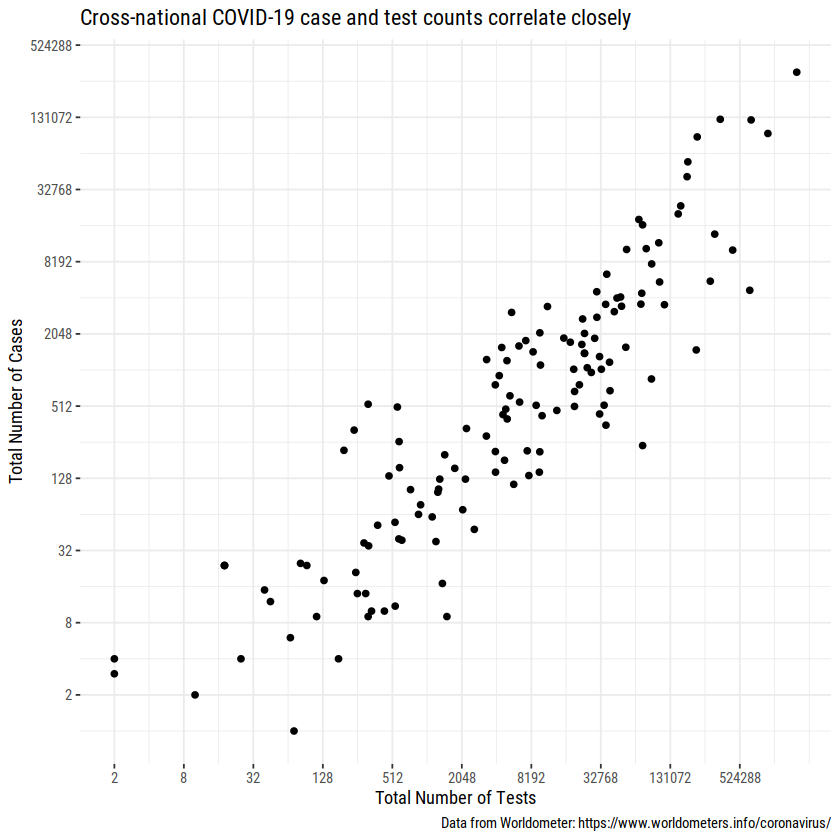

In [13]:
dat %>%
  ggplot(aes(x = TotalTests, y = TotalCases)) +
  geom_point() +
  #geom_smooth(method = "lm", se = F) + 
  scale_y_continuous(trans = "log2", breaks = 2^seq(1, 20, 2)) + 
  scale_x_continuous(trans = "log2", breaks = 2^seq(1, 20, 2)) + 
  labs(x = "Total Number of Tests", 
       y = "Total Number of Cases",
       title = "Cross-national COVID-19 case and test counts correlate closely",
       caption = "Data from Worldometer: https://www.worldometers.info/coronavirus/") 

In [14]:
m1 <- lm(TotalCases ~ TotalTests, dat)
m2 <- lm(TotalCases ~ TotalTests + I(log(gdppc)) + equator_km, dat)


In [15]:
huxreg(m1, m2)

Registered S3 methods overwritten by 'broom.mixed':
  method         from 
  augment.lme    broom
  augment.merMod broom
  glance.lme     broom
  glance.merMod  broom
  glance.stanreg broom
  tidy.brmsfit   broom
  tidy.gamlss    broom
  tidy.lme       broom
  tidy.merMod    broom
  tidy.rjags     broom
  tidy.stanfit   broom
  tidy.stanreg   broom



names,model1,model2
<chr>,<chr>,<chr>
,(1),(2)
(Intercept),-1578.19638937209,-329.973229993382
,(1397.73665162211),(11502.608955256)
TotalTests,0.154836001501305 ***,0.155968677736854 ***
,(0.00716849773786912),(0.00834753557179475)
I(log(gdppc)),,51.5243505004248
,,(1405.62733414259)
equator_km,,-0.668922967710782
,,(0.994247436334009)
